<a href="https://colab.research.google.com/github/lazaroOliveiraUFRN/PPGTI3100_2024/blob/main/6_Estrat%C3%A9gia_verificar_apenas_a_dist%C3%A2ncia_cosseno_spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open('/content/drive/MyDrive/disciplinas/PPGTI3100 - TÓPICOS AVANÇADOS EM INTELIGÊNCIA COMPUTACIONAL 1/trabalho_final/lista_produtos_embed.pickle', 'rb') as f:
    lista_produtos_embed = pickle.load(f)

In [ ]:
len(lista_produtos_embed)

5000

In [ ]:
lista_produtos_embed[0].keys()

dict_keys(['produto', 'embedding'])

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,AffinityPropagation,OPTICS,MiniBatchKMeans,SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score


import numpy as np


import scipy
import pandas as pd

from ipywidgets import IntProgress
from IPython.display import display
import time

from sklearn.preprocessing import MaxAbsScaler

from sklearn.decomposition import PCA,TruncatedSVD
from math import pi

import html

In [ ]:
lista_embed = []
for idx, palavra in enumerate(lista_produtos_embed):
    e={}
    for idx2, embed in enumerate(palavra['embedding']):
        e['componente'+str(idx2)] = embed

    lista_embed.append(e)


In [ ]:
df = pd.DataFrame(lista_embed)
df

,componente0,componente1,componente2,componente3,componente4,componente5,componente6,componente7,componente8,componente9,...,componente1014,componente1015,componente1016,componente1017,componente1018,componente1019,componente1020,componente1021,componente1022,componente1023
0,-0.021571,-0.562216,0.089743,0.219388,-0.955722,0.322036,-0.335170,-0.709030,0.630074,1.229450,...,0.574111,-0.614863,-0.710130,-0.395264,0.404117,0.392513,0.894582,0.124588,-0.646944,-0.055636
1,-0.067221,0.276813,0.214833,0.030875,-0.864870,-0.081484,0.086455,1.078886,0.417502,0.029938,...,0.548498,-0.344622,-0.123327,-1.235238,0.496079,0.416169,0.173805,0.455880,-0.144961,-0.185869
2,-0.069652,0.016040,0.732337,1.193550,-1.069639,-0.859732,0.729909,-0.000229,0.002312,0.451601,...,0.397316,-0.300321,0.659257,-1.521803,0.697367,1.049778,0.258827,0.020332,0.115583,-0.697766
3,-0.506065,0.211458,-0.149546,-0.549066,-0.161728,-0.279260,0.629083,0.869421,1.066289,0.455305,...,0.666102,-0.557528,-0.460101,-0.289759,0.541869,1.003588,0.635891,0.184364,-0.516524,0.298978
4,0.631491,-0.057003,-0.418897,0.302046,0.591468,0.143512,-0.516046,0.098459,-0.112373,0.540114,...,0.501379,0.223384,0.109676,-0.430208,0.666874,0.385281,-0.280646,0.530085,-0.398528,-0.560988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.506579,-0.475397,0.797187,0.432756,-0.865019,-0.506854,0.515221,0.567821,0.202640,-0.137207,...,0.575074,-0.704916,0.538222,-1.068491,0.119741,0.634903,-0.482652,-0.318976,0.560872,0.106244
4996,0.182667,0.481504,0.284632,0.637492,0.159716,-0.174611,-0.023207,-0.034162,0.391219,0.566020,...,0.824098,-0.076228,-1.225039,-0.675857,0.837400,0.303992,0.244490,0.188342,-0.720354,0.215137
4997,-0.674225,0.111773,0.059466,0.881678,-0.452042,-0.592751,0.045895,-0.366888,0.470882,0.813688,...,1.255912,-0.057772,-0.655826,-1.477663,0.345116,0.801957,0.573005,-0.101548,0.485669,-0.767395
4998,-0.101503,-0.182968,0.875998,0.231721,-0.187170,-0.578731,-0.151346,-0.438941,-0.301282,0.533442,...,1.652978,-0.704002,-0.235793,-0.193203,0.778873,0.612088,-0.052447,0.532810,0.130195,0.730119


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(df)
np.fill_diagonal(cosine_similarities, 0)
cosine_similarities[cosine_similarities < 0.5] = 0
cosine_similarities

array([[0.        , 0.        , 0.        , ..., 0.59316891, 0.        ,
        0.50250691],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55652588],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.56277016],
       ...,
       [0.59316891, 0.        , 0.        , ..., 0.        , 0.52918719,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.52918719, 0.        ,
        0.        ],
       [0.50250691, 0.55652588, 0.56277016, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
type(cosine_similarities)

numpy.ndarray

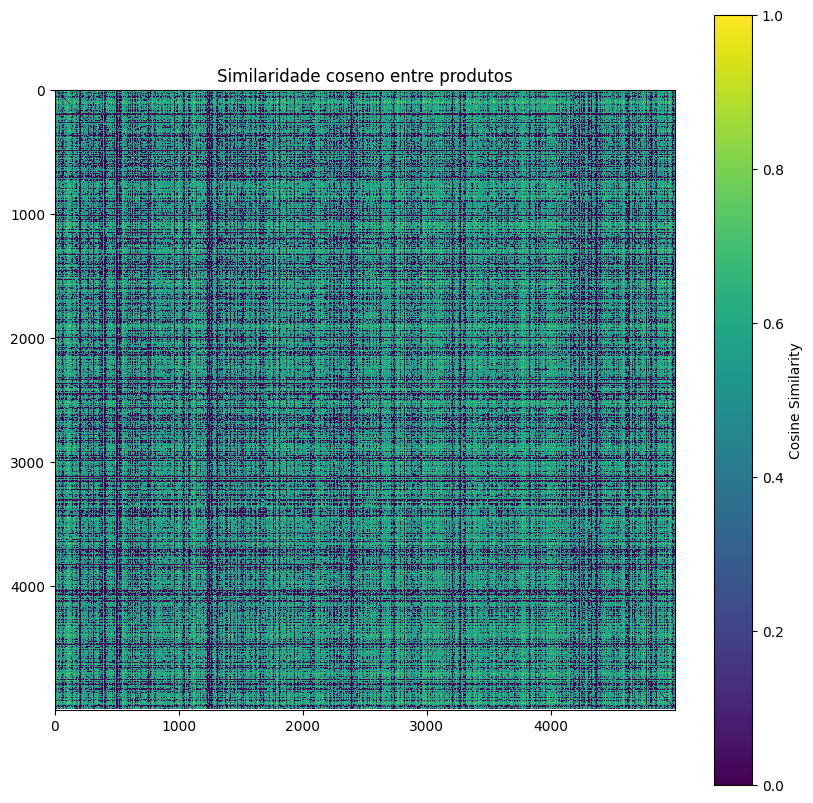

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cosine_similarities, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Similaridade coseno entre produtos')
plt.show()

Com Similaridade foi possível obter em termos práticos produtos bastantes parecidos.

In [ ]:
from sklearn.cluster import SpectralClustering

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

faixa=range(2,35,5)
cluster_inertia=[]



X = cosine_similarity(df)

for k in faixa:
    #model=KMeans(n_clusters=k,init='k-means++', max_iter=30, n_init=751, verbose=0)
    #model=MiniBatchKMeans(n_clusters = idx, batch_size=128)
    #model.fit(cosine_dissimilarities)
    model = SpectralClustering(n_clusters=k,affinity='precomputed',random_state=751)
    labels = model.fit_predict(X)
    Y=labels
    value_silhouette_score=0
    value_silhouette_score=silhouette_score(X,Y)
    value_davies_bouldin_score = davies_bouldin_score(X, Y)
    print(k,';',value_silhouette_score,value_davies_bouldin_score)
    e={'cluster':k,'silhouette_score':value_silhouette_score, 'davies_bouldin_score':value_davies_bouldin_score}
    cluster_inertia.append(e)


2 ; 0.15679223634033307 2.2330180853567203
7 ; 0.06908128843756933 2.373347044959914
12 ; 0.02050149260916902 3.1262185572671615
17 ; 0.008140698282744422 3.5559431347037975
22 ; -0.00949792719609474 3.583618232746852
27 ; -0.019125296856249384 3.762097149577299
32 ; -0.04646525251530372 4.066018624920343
